In [67]:
# import packages here
import pandas as pd
import numpy as np
import sqlite3 as sq
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=10,10

In [68]:
crime=pd.read_csv('May8Crime.csv')

In [69]:
crime.head()

,Unnamed: 0,incident_number,offense_code_group,offense_description,occurred_on_date,month,day_of_week,hour,street,lat,long,location,Missing_Data
0,0,I182070943,Vandalism,VANDALISM,2018/8/21 0:00,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",0
1,1,I182070872,Vandalism,VANDALISM,2018/8/31 17:00,8,Friday,17,A ST,42.347543,-71.050662,"(42.34754258, -71.05066210)",0
2,2,I182070857,Property Lost,PROPERTY - LOST,2018/8/22 14:00,8,Wednesday,14,HUNTINGTON AVE,42.344812,-71.082343,"(42.34481182, -71.08234324)",0
3,3,I182070841,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2018/8/20 12:00,8,Monday,12,SHEPARD ST,42.346002,-71.151120,"(42.34600153, -71.15112006)",0
4,4,I182070834,Larceny,LARCENY THEFT FROM BUILDING,2018/8/23 10:41,8,Thursday,10,RADCLIFFE RD,42.350854,-71.134089,"(42.35085449, -71.13408859)",0


In [70]:
crime= crime.drop(columns=['Unnamed: 0'])

In [71]:
crime.head()

,incident_number,offense_code_group,offense_description,occurred_on_date,month,day_of_week,hour,street,lat,long,location,Missing_Data
0,I182070943,Vandalism,VANDALISM,2018/8/21 0:00,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",0
1,I182070872,Vandalism,VANDALISM,2018/8/31 17:00,8,Friday,17,A ST,42.347543,-71.050662,"(42.34754258, -71.05066210)",0
2,I182070857,Property Lost,PROPERTY - LOST,2018/8/22 14:00,8,Wednesday,14,HUNTINGTON AVE,42.344812,-71.082343,"(42.34481182, -71.08234324)",0
3,I182070841,Fraud,FRAUD - FALSE PRETENSE / SCHEME,2018/8/20 12:00,8,Monday,12,SHEPARD ST,42.346002,-71.151120,"(42.34600153, -71.15112006)",0
4,I182070834,Larceny,LARCENY THEFT FROM BUILDING,2018/8/23 10:41,8,Thursday,10,RADCLIFFE RD,42.350854,-71.134089,"(42.35085449, -71.13408859)",0


In [72]:
crime.describe()

,month,hour,lat,long,Missing_Data
count,50299.000000,50299.000000,47025.000000,47025.000000,50299.000000
mean,5.546114,13.121235,42.150497,-70.805816,0.068789
std,1.680265,6.260998,2.719398,4.399048,0.253097
min,3.000000,0.000000,-1.000000,-71.178674,0.000000
25%,4.000000,9.000000,42.296816,-71.097074,0.000000
50%,6.000000,14.000000,42.325029,-71.077683,0.000000
75%,7.000000,18.000000,42.348175,-71.062563,0.000000
max,8.000000,23.000000,42.395042,-1.000000,1.000000


Creating dataframe for crimes WITHOUT location data

In [86]:
df1= crime[crime['Missing_Data']==1]
df2= crime[crime['Missing_Data']==0]

In [125]:
def piechart(merged_frequency):
    
    my_explode1 = [0]*55
    my_explode1[54]=0.2
    my_explode1[53]=0.2
    
    sorted_x = merged_frequency.sort_values('count_x')
    index_x = sorted_x['index']
    x = sorted_x['count_x']
    fig1,ax1 = plt.subplots()
    ax1.pie(x,labels=index_x,startangle=90,autopct='%1.1f%%',textprops={'fontsize':10}, explode=my_explode1,labeldistance=1.2)
    ax1.axis('equal')
    ax1.set_title("Missing(n=3460)",loc="right",color="r",fontsize=30)
    
    my_explode2 = [0]*55
    my_explode2[54]=0.2
    my_explode2[47]=0.2
    
    sorted_y = merged_frequency.sort_values('count_y')
    index_y = sorted_y['index']
    y = sorted_y['count_y']
    fig2,ax2 = plt.subplots()
    ax2.pie(y,labels=index_y,startangle=90,autopct='%1.1f%%',textprops={'fontsize':10}, explode=my_explode2, labeldistance=1.2)
    ax2.axis('equal')
    ax2.set_title("Normal(n=46839)",loc="left",color="r",fontsize=30)

In [151]:
def compare(missing,normal,column_name):
    column_name = str(column_name)
    n=0

    for i in [missing,normal]:
        n+=1
        ser = i[column_name].value_counts()
        list_ser = list(ser)
        compare_index = list(ser.index)
        d={'index':compare_index, 'count':list_ser}
        df = pd.DataFrame(data=d)

        frequency = df.sort_values('index')
        frequency = frequency.reset_index()
        frequency = frequency.drop(columns=['level_0'])

        if n==1:
            frequency_missing = frequency
        else:
            frequency_normal = frequency

    merged_frequency= frequency_missing.merge(frequency_normal,how='inner',on='index')
    # Contingency Table
    #print(merged_frequency)
    mf=merged_frequency.to_numpy()
    mf = np.transpose(mf)
    mf = mf[1:3]
    chi2, p, dof, ex = chi2_contingency(mf)
    #print("chi2",chi2)
    print("p-value",p)
    #print("expected table",ex)
    #Normalized table
    index = merged_frequency['index']
    x = merged_frequency['count_x']
    y = merged_frequency['count_y']
    
    sum_x = sum(x)
    for j in range(len(x)):
        v = float(x[j]/sum_x)
        x.loc[j]=v
    
    sum_y = sum(y)
    for j in range(len(y)):
        v = float(y[j]/sum_y)
        y.loc[j]=v
        
    if column_name == 'offense_code_group':
        piechart(merged_frequency)
    else:        
    #Comparative bar chart
        X_axis = np.arange(len(index))
        plt.bar(X_axis - 0.2, x, 0.4, tick_label=index, label = 'missing(n=3460)')
        plt.bar(X_axis + 0.2, y, 0.4, label = 'normal(n=46839)')
        plt.legend()
    
    return(merged_frequency)

p-value 3.764353934910259e-12


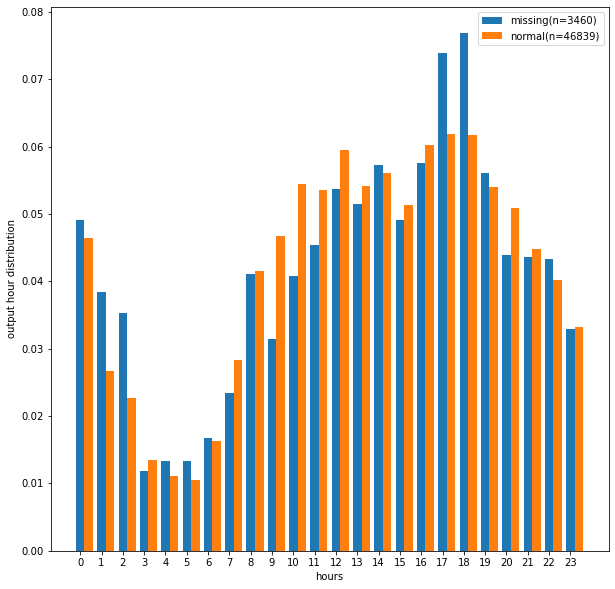

In [152]:
output_hour = compare(df1,df2,'hour')
output_hour['residuals']=output_hour['count_x']-output_hour['count_y']
output_hour
plt.ylabel('output hour distribution')
plt.xlabel('hours')
plt.show()

In [153]:
output_hour

,index,count_x,count_y,residuals
0,0,0.049133,0.046436,0.002697
1,1,0.038439,0.026730,0.011709
2,2,0.035260,0.022737,0.012523
3,3,0.011850,0.013450,-0.001601
4,4,0.013295,0.011123,0.002172
5,5,0.013295,0.010483,0.002812
6,6,0.016763,0.016290,0.000473
7,7,0.023410,0.028267,-0.004857
8,8,0.041040,0.041611,-0.000570
9,9,0.031503,0.046735,-0.015232


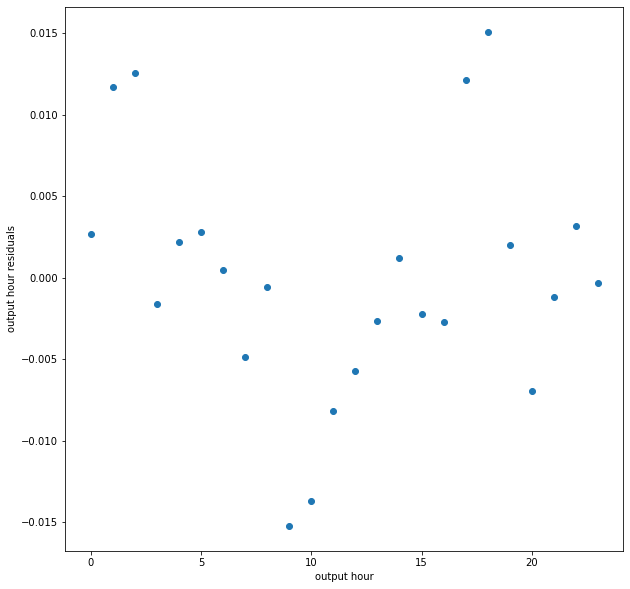

In [154]:
plt.scatter(output_hour['index'],output_hour['residuals'])
plt.ylabel('output hour residuals')
plt.xlabel('output hour')
plt.show()

p-value 0.015256857019783004


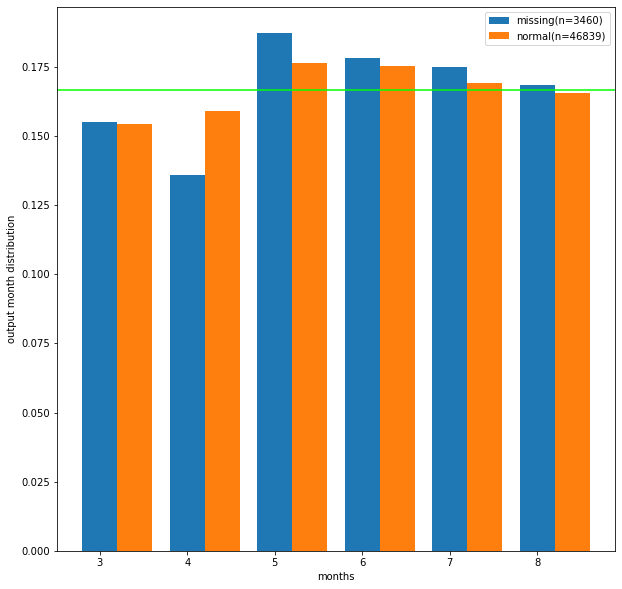

In [155]:
output_month = compare(df1,df2,'month')
# output_month
plt.ylabel('output month distribution')
plt.xlabel('months')
plt.axhline(y=1/6,linewidth=1.5, color='lime')
plt.show()

In [156]:
output_month

,index,count_x,count_y
0,3,0.155202,0.154380
1,4,0.135838,0.158970
2,5,0.187283,0.176306
3,6,0.178324,0.175431
4,7,0.174855,0.169367
5,8,0.168497,0.165546


p-value 0.4098689111922154


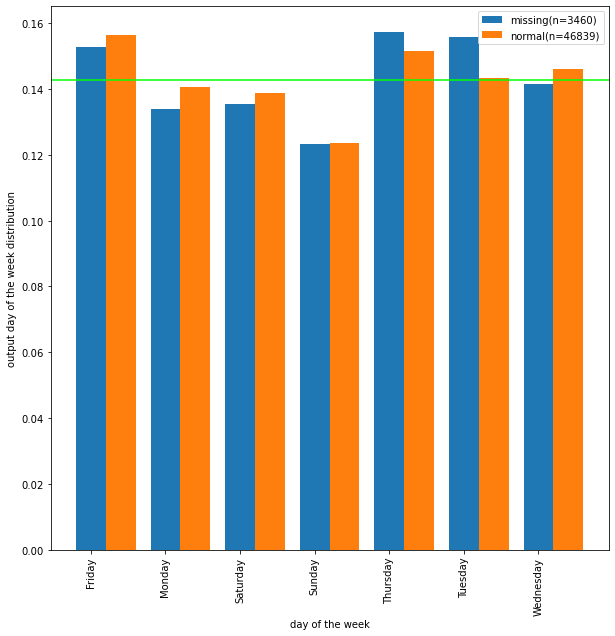

In [157]:
output_day = compare(df1,df2,'day_of_week')
output_day
plt.xticks(rotation=(90))
plt.ylabel('output day of the week distribution')
plt.xlabel('day of the week')
plt.axhline(y=1/7,linewidth=1.5, color='lime')
plt.show()

In [158]:
output_day

,index,count_x,count_y
0,Friday,0.152601,0.156323
1,Monday,0.133815,0.140588
2,Saturday,0.135549,0.138752
3,Sunday,0.123410,0.123508
4,Thursday,0.157225,0.151391
5,Tuesday,0.155780,0.143449
6,Wednesday,0.141618,0.145989


p-value 0.0


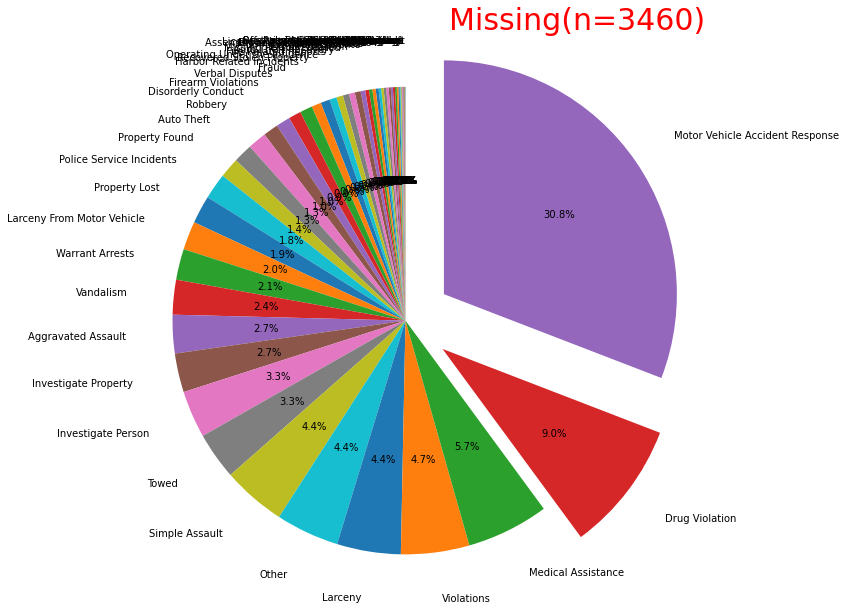

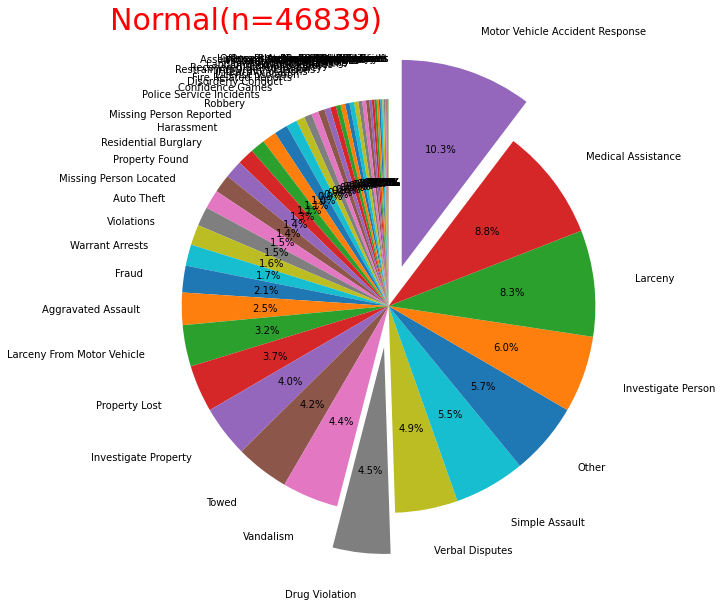

In [127]:
output_offense = compare(df1,df2,'offense_code_group')
plt.show()


#plt.figure(figsize=(600,600),dpi=1000)

In [162]:
# 1-Proportion Z-test for Motor Vehicle Response
p1 = output_offense['count_x'][33]
p0 = output_offense['count_y'][33]
n = 3460
x = p1*n
print(x)
stats.binom_test(x, n, p=p0, alternative='greater')
# Since p-value is smaller than alpha = 0.01, we conclude that the frequency of motor vehicle accident response
# when the location is unreported is significantly greater than the frequency of that type of crime when the location is reported.

1067.0


3.5922315264425446e-240

In [163]:
# 1-Proportion Z-test for Drug Violation
p1 = output_offense['count_x'][11]
p0 = output_offense['count_y'][11]
n = 3460
x = p1*n
print(x)
stats.binom_test(x, n, p=p0, alternative='greater')
# Since p-value is smaller than alpha = 0.01, we conclude that the frequency of drug violation
# when the location is unreported is significantly greater than the frequency of that type of crime when the location is reported.

313.0


3.505261503568094e-30

In [161]:
output_offense

,index,count_x,count_y
0,Aggravated Assault,0.026590,0.025240
1,Aircraft,0.000289,0.000085
2,Arson,0.000289,0.000256
3,Assembly or Gathering Violations,0.002023,0.002009
4,Auto Theft,0.013295,0.014939
5,Auto Theft Recovery,0.004335,0.003334
6,Ballistics,0.001445,0.002949
7,Commercial Burglary,0.000289,0.003697
8,Confidence Games,0.002312,0.008549
9,Counterfeiting,0.000578,0.003505


*Assumptions for Test of Independence were examined:
1. Simple Random Sample of n subjects
2. Two variables/factors 𝑅, 𝐶 of interest with each having 𝑟, 𝑐 mutually exclusive and exhaustive categories/outcomes/levels, respectively.
3. Each subject can be classified according to one level of each factor of interest.
4. Expected number of outcomes, assuming independence, for each pairing of levels, across factors, is at least 1. That is, 𝐸  G,[ ≥ 1 for all pairs (𝑖, 𝑗). Further, no more than 20% should be less than 5.

The null hypothesis is that whether the crime location is recorded is independent from the hour of the day. 

Since the p-value (7.02e-12) in the chi2 test is significantly lower than 0.05, we reject the null hypothesis. 

Whether the crime location is recorded is not independent of the hour of the day. 